# AVIATION RISK ANALYSIS

## 📊 Data-Driven Strategy to entering the aviation industry
This project uses the National Transportation Safety Board aviation accident data from 1962 to 2023 in United States and international waters. We will use this to identify strategic opportunities, risks and patterns.

Through exploratory data analysis, trends and visualizations, we will give concrete data-driven business recommendations. This will help investors, insurers assess the risk exposurers and make informed decisions that are low risk.


### ❓ Key Business Questions
As we seek the answers to the questions below, the questions will guide the direction of my project
1. Which aircraft make are least frequently involved in accidents
    - This helps decide on the make or manufacturers(amateur built)
2. What are the most common causes of aviation accidents
    - This helps to understand risk trends, are newer models safer than older one
3. What percentage of accidents are survivable and what factors influence survivability?
    - Here, we will check on engines, weather
4. How do accident rates vary by operator type (commercial vs private)
    - This help to decide the aviation sector to indulge in
5. Are there seasonal patterns in aviation accidents
    - This helps in weather contingency planning
6. What factors contribute to fatal accidents(weather, broad phase of flight)
    - Helps decide on aircraft specs

## 📂Data Understanding

In this section, we examine the datasets used in the project from the National Transportation Safety Board aviation accident data from [Our Dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses). We familiarize ourselves with the dataset structure. We thoroughly go through the columns and rows, identify missing data, categorical grouping and data range.

We analyze the data quality by checking for completeness,consistency, uniqueness and distributions. A clean dataset gives clear and accurate analysis and visualizations.



In [1]:
# Importing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#import the csv file AviationData
AviData = pd.read_csv('Data\AviationData.csv', encoding= 'latin1', low_memory= False)

In [3]:
# The first 5 rows
AviData.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# column names#
AviData.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [5]:
# Information on the dataset
AviData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
# shape of the dataset
AviData.shape

(88889, 31)

In [7]:
#To check missing values in percentage from large to small
AviData.isna().mean().sort_values(ascending=False)

Schedule                  0.858453
Air.carrier               0.812710
FAR.Description           0.639742
Aircraft.Category         0.636772
Longitude                 0.613304
Latitude                  0.613203
Airport.Code              0.434699
Airport.Name              0.406113
Broad.phase.of.flight     0.305606
Publication.Date          0.154924
Total.Serious.Injuries    0.140737
Total.Minor.Injuries      0.134246
Total.Fatal.Injuries      0.128261
Engine.Type               0.079616
Report.Status             0.071786
Purpose.of.flight         0.069660
Number.of.Engines         0.068445
Total.Uninjured           0.066510
Weather.Condition         0.050535
Aircraft.damage           0.035932
Registration.Number       0.014816
Injury.Severity           0.011250
Country                   0.002542
Amateur.Built             0.001147
Model                     0.001035
Make                      0.000709
Location                  0.000585
Event.Date                0.000000
Accident.Number     

#### Observation

- We have 31 columns and 88889 rows.
- Most of our columns have categorical data; some of which we will have to change
- Most of our columns have missing data, a few have more than 60% missing data

##### Point to note
We will have to go through each column to decide wether to replace or fill
- We will use fillna() or replace()
- We use 'unknown' for categorical data and mean or 0 for numerical data
- We can also drop columns using dropna()

##### Next step
 - We make a copy before any changes to preserve the original dataset
 - Go through each column and find if it's important in our analysis
 - Identify what to drop
 - 






In [8]:
#copy of the original data before we start dropping 
data = AviData.copy(deep=True)
data.shape

(88889, 31)

In [9]:
data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [11]:
# normalize column names
data.columns= data.columns.str.strip().str.lower().str.replace('.','_')
data.columns


Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

## Data Preparation
In this section we will perform
- Data cleaning
- Exploratory data analysis
- Feature Engineering


### 🧼 Data Cleaning

The goal of data cleaning is to transform the raw dataset into a structured and reliable format suitable for analysis. Key steps included:
Handle missing values, Drop columns with excessive missing data, Impute missing values using appropriate statistical or categorical strategies, Data Filtering, Remove irrelevant or incomplete records (e.g. non-aircraft incidents or missing key variables), Categorical Grouping, Group low-frequency entries under broader labels (e.g. "Other"), Data Type Correction, Convert date columns to proper datetime format, Ensure numerical columns were correctly typed for analysis, and Outlier Treatment.
These steps ensure we have a clean, consistent, and relevant dataset to move forward with meaningful visualizations and business insights.


In [12]:
#set to show all items
pd.set_option('display.max_columns',None)
#To check missing values in each column
data.isna().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                     52
country                     226
latitude                  54507
longitude                 54516
airport_code              38640
airport_name              36099
injury_severity            1000
aircraft_damage            3194
aircraft_category         56602
registration_number        1317
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7077
far_description           56866
schedule                  76307
purpose_of_flight          6192
air_carrier               72241
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
report_status              6381
publication_date          13771
dtype: i

#### Dropping columns
From data understanding above, we learned that most of our columns were missing values. We will drop all columns missing more than 15%. It may seem very extreme but we chose that percentage since also all of the other columns we don't need are in this percentage. It is important to note that analysis with more than 40% missingness may lead to biasness
 - Example: 
 1. Schedule and air carrier have more than 80% missing values, fillna with mode will bias analysis
 - We may keep far description and aircraft category by filling in unknown 

In [13]:
#identify what to retain
retain= ['far_description','aircraft_category']
#Select the threshold for missing values
threshold= 0.15 
#find columns with 15% or more missing values
dropped_all= data.columns[data.isna().mean()>=threshold]
#exempt the columns to retain
dropped=[col for col in dropped_all if col not in retain]
#drop the identified columns
data= data.drop(columns=dropped)
data.shape

(88889, 23)

In [14]:
#change everything to lowercase
text_columns = data.select_dtypes(include=['object', 'category']).columns

for col in text_columns:
    data[col] = data[col].str.lower().replace(
        {'none': 'unknown', 'unknown': 'unknown', 'unk': 'unknown'}
    )

#### a. Far description and Aircraft category

We will fill the missing values with unknown since most of the values are missing. Filling any other thing will affect the analysis

In [15]:
#uniform unique values in far description
data['far_description']=data['far_description'].replace({'Unknown': 'unknown', 'UNK': 'unknown', '091': 'part 91: General Aviation'})

#uniform unique values in aircraft category
data['aircraft_category']=data['aircraft_category'].replace({'Unknown': 'unknown', 'UNK': 'unknown'})

#fill retain with unknown
[data[col].fillna('unknown', inplace=True)for col in retain]


[None, None]

#### b. Event_id
#### Observation 
We will keep the event_id 
- It has no missing values
- The difference in total and unique events is because some event_ids are similar
- The other values in the rows are not all similar

In [16]:
#we check for duplicates in event_id
missing_events= data['event_id'].isna().sum()
unique_events= data['event_id'].nunique()
total_events = len(data['event_id'])
print(f'There are {unique_events} unique events out of {total_events} total events')
print(f'There are {missing_events} missing events')

There are 87951 unique events out of 88889 total events
There are 0 missing events


#### c. Investigation type

We will keep this column
- It has 2 values (Accident, Incident)
- It has 0 missing values


In [17]:
#check for missing values
msn= data['investigation_type'].isna().sum()
nun= data['investigation_type'].nunique()
print(f'There are {msn} missing values and {nun} unique values')



There are 0 missing values and 2 unique values


#### d. Accident Number
#### Observation
The column has no missing values
The column has 88863 unique values
We will keep it


In [18]:
msn1= data['accident_number'].isna().sum()
nun1= data['accident_number'].nunique()
print(f'There are {msn1} missing values and {nun1} unique values')

There are 0 missing values and 88863 unique values


#### e. Event Date
#### Observation
We will normalize the dates so they are all uniform
- We set the date format to year-month-day
- The column has no missing values

In [19]:
#changing dtype to datetime
data['event_date']=pd.to_datetime(data['event_date'])#y-m-day
msn2= data['event_date'].isna().sum()
type= data['event_date'].dtype
print(f'There are {msn2} missing values and the data type is {type}')

There are 0 missing values and the data type is datetime64[ns]


#### f. Location & Country
- We had 52 missing values that we filled with unknown
- We will merge Us state codes with the location
- We will also fill missing data in country with unknown

In [20]:
#load us_codes
codes = r"C:\Users\USER\Documents\moringa_school\phase_1\phase_1_project\Data\USState_Codes.csv"
us_codes = pd.read_csv(codes, encoding='latin1', low_memory=False)

In [21]:
# standardize location and country using the above dataset
oldl= ['MISSING','Unknown', 'UNK']
newl= 'unknown'
data['location'].replace('oldl','newl')
state_dict= dict(zip(us_codes['US_State'].str.lower(),us_codes['Abbreviation']))
data['location']=data['location'].str.lower().map(state_dict).fillna(data['location'])
data['location'].fillna('unknown',inplace=True)

abbrevs= us_codes['Abbreviation'].tolist()
data['country']= data.apply(
     lambda x: 'USA' if x['location'] in abbrevs else x['country'], axis=1
                            )
data['country'].fillna('unknown', inplace=True)




#### g. Make, Model & Amateur build

Since the missing values are very small 1% we will fill the mode for categorical values and median for numerical values

In [22]:
#Fill median and mode for <1% missingness
low_missing_cols = data.columns[(data.isna().sum() > 0) & (data.isna().sum() < 0.01 * len(data))]
print(f"Columns with <1% missing values: {list(low_missing_cols)}")
#Fill missing values and make values uniform
for col in low_missing_cols:
    if data[col].dtype in ['object', 'category']:  # Categorical
        data[col].fillna(data[col].mode()[0], inplace=True)
#make the unique values uniform
[data[col].str.lower().replace('UNKNOWN','unknown') for col in low_missing_cols]


Columns with <1% missing values: ['make', 'model', 'amateur_built']


[0                           stinson
 1                             piper
 2                            cessna
 3                          rockwell
 4                            cessna
                     ...            
 88884                         piper
 88885                      bellanca
 88886    american champion aircraft
 88887                        cessna
 88888                         piper
 Name: make, Length: 88889, dtype: object,
 0            108-3
 1         pa24-180
 2             172m
 3              112
 4              501
            ...    
 88884    pa-28-151
 88885         7eca
 88886        8gcbc
 88887         210n
 88888    pa-24-260
 Name: model, Length: 88889, dtype: object,
 0        no
 1        no
 2        no
 3        no
 4        no
          ..
 88884    no
 88885    no
 88886    no
 88887    no
 88888    no
 Name: amateur_built, Length: 88889, dtype: object]

#### h. Injuries & number of engines

Since total fatal injuries, total serious injuries, total minor injuries, and total uninjured have moderately high level of missingness, we will fill the missing values with 0 and median for number of engines


In [23]:
# #fill missing values
# uniq= pd.DataFrame((data['total_fatal_injuries'].unique()),
#                    columns=['total_fatal_injuries'])
# uniq
int_col=['number_of_engines','total_fatal_injuries','total_serious_injuries',
         'total_minor_injuries','total_uninjured']
data[int_col].replace(' ','NaN')
for col in int_col:
    data[col].fillna(data[col].median(), inplace=True)  # Impute with median

#Convert numerical columns to integer type
for col in int_col:
    if col in data.columns:
        try:
            data[col] = data[col].astype(int)
        except ValueError as e:
            print(f"Error converting {col} to int: {e}")
            print(f"Unique values in {col}: {data[col].unique()}")


#### i. aircraft damage, registration number, engine type, purpose of flight, weather condition, report status, injury severity

We will also fill unknown for the missing values in the above columns.
For columns  like registration number we cannot just imput any number like a median or median since it is a unique value.

In [24]:
# Function to classify injury severity
def classify_injury_severity(value):
    if pd.isna(value) or str(value).strip().lower() in ['', 'unavailable', 'unknown']:
        return 'unknown'
    
    value = str(value).strip().lower()

    if 'non-fatal' in value:
        return 'Non-Fatal'
    elif 'fatal' in value:
        return 'Fatal'
    elif 'incident' in value:
        return 'Incident'
    elif 'accident' in value:
        return 'Accident (No Injury)'
    else:
        return 'unknown'

# Apply the function
data['clean_injury_severity'] = data['injury_severity'].apply(classify_injury_severity)

moderate_missing_cols = ['aircraft_damage', 'registration_number', 'engine_type', 
                         'purpose_of_flight', 'weather_condition', 'report_status',
                         'clean_injury_severity']
print(f"Columns with moderate missing values: {list(moderate_missing_cols)}")
#Replace and fill with unknown
for col in moderate_missing_cols:
     if col in data.columns and data[col].dtype in ['object', 'category']:
        data[col].replace({'None':'unknown', 'Unknown':'unknown','NONE':'unknown','UNK':'unknown','Unk':'unknown'})
        data[col].fillna('unknown', inplace=True)


Columns with moderate missing values: ['aircraft_damage', 'registration_number', 'engine_type', 'purpose_of_flight', 'weather_condition', 'report_status', 'clean_injury_severity']


In [25]:
#Verify dataset is clean
data.isna().sum()

event_id                     0
investigation_type           0
accident_number              0
event_date                   0
location                     0
country                      0
injury_severity           1000
aircraft_damage              0
aircraft_category            0
registration_number          0
make                         0
model                        0
amateur_built                0
number_of_engines            0
engine_type                  0
far_description              0
purpose_of_flight            0
total_fatal_injuries         0
total_serious_injuries       0
total_minor_injuries         0
total_uninjured              0
weather_condition            0
report_status                0
clean_injury_severity        0
dtype: int64

In [26]:
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Columns: 24 entries, event_id to clean_injury_severity
dtypes: datetime64[ns](1), int32(5), object(18)
memory usage: 14.6+ MB


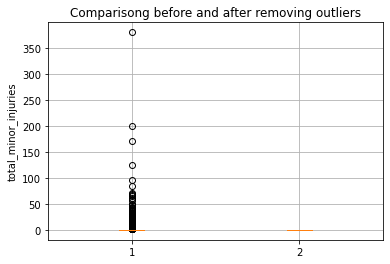

In [27]:
# Outliers in total minor injuries using IQR
Q1 = data['total_minor_injuries'].quantile(0.25)
Q3 = data['total_minor_injuries'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers
no_outliers = data[(data['total_minor_injuries'] >= lower_bound) & (data['total_minor_injuries'] <= upper_bound)]
plt.boxplot([data['total_minor_injuries'], no_outliers['total_minor_injuries']])
plt.title('Comparisong before and after removing outliers')
plt.ylabel('total_minor_injuries')
plt.grid(True);

#### Observation
Total minor injuries is now zero for all measures of central tendency after outliers are removed

In [28]:
#Save the clean dataset
data.to_csv('clean_aircraft.csv',index=False)

### Exploratory Data Analysis
Here we will use visualization tools to answer the business questions that guide our analysis; in business understanding

In [29]:
# Measure of Central Tendency
stat_summary= {}
for col in int_col:
    stat_summary[col]= {
        'Mean': data[col].mean(),
        'Min': data[col].min(),
        'Max': data[col].max(),
        'Median': data[col].median(),
        'Mode': data[col].mode().values[0],
        'Skewness': data[col].skew(),
        'Kurtosis': data[col].kurtosis()
    }
stat_summary_data= pd.DataFrame(stat_summary).T.round(2)
stat_summary_data

,Mean,Min,Max,Median,Mode,Skewness,Kurtosis
number_of_engines,1.14,0.0,8.0,1.0,1.0,2.71,13.15
total_fatal_injuries,0.56,0.0,349.0,0.0,0.0,35.32,1552.21
total_serious_injuries,0.24,0.0,161.0,0.0,0.0,53.01,4315.73
total_minor_injuries,0.31,0.0,380.0,0.0,0.0,93.38,14193.99
total_uninjured,5.04,0.0,699.0,1.0,1.0,9.41,112.31


#### Interpretation on Measure of Central Tendency
1. mean, median, mode
 - most accident s don't result in injuries since median and mode is 0
 - For total injured most flights have 1 uninjured (small aircraft)
   but some have many as in mean of 5.04 (commercial flights)
2. Skewness
 - We have a positive skew meaning data has a long tailon the right
 - Injury columns have positive skewness meaning most values are zero or less
 - total minor injuries has a hugh skew which could be a result of outliers
3. Kurtosis
- A normal distribution has kurtosis approaching 3
- Values > 3 indicate heavy tails (outliers); this shows we have extreme outliers

#### a. Univariate Analysis

- For numerical columns, we will find the summary statistics; mean. median, std deviation, min and max and we will plot a histogram for our visualization.
- For categorical columns, we will use count plots and bar plots

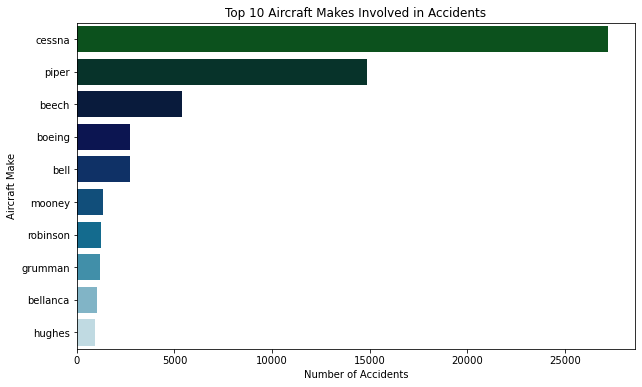

In [30]:
# Plot distribution of Aircraft Make (Top 10)
plt.figure(figsize=(10,6))
top_makes = data['make'].value_counts().nlargest(10)
sns.barplot(x=top_makes.values, y=top_makes.index, palette='ocean')
plt.title('Top 10 Aircraft Makes Involved in Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Make')
plt.show()

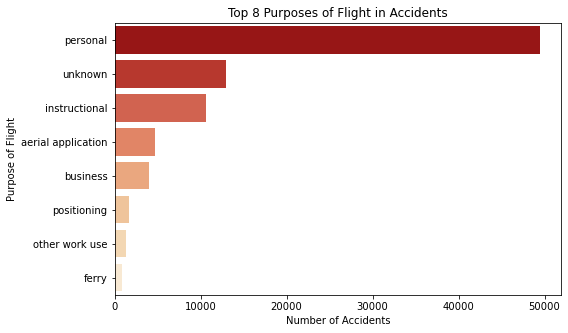

In [31]:
# Plot distribution of Purpose of Flight
plt.figure(figsize=(8,5))
top_purpose = data['purpose_of_flight'].value_counts().nlargest(8)
sns.barplot(x=top_purpose.values, y=top_purpose.index, palette='OrRd_r')
plt.title('Top 8 Purposes of Flight in Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Purpose of Flight')
plt.show()

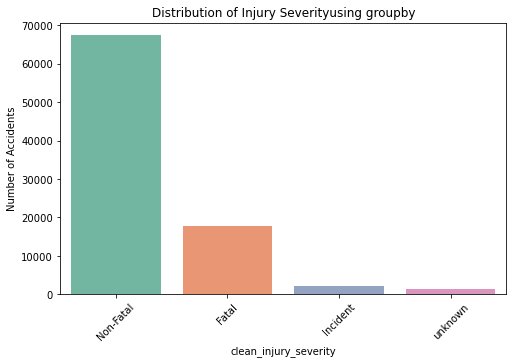

In [32]:
# Use groupby to count injury severity
injury_counts = data.groupby('clean_injury_severity').size().reset_index(name='counts')

# Sort by counts for better visual order
injury_counts = injury_counts.sort_values(by='counts', ascending=False)

# Plot distribution of Injury Severity
plt.figure(figsize=(8,5))
sns.barplot(data=injury_counts, x='clean_injury_severity', y='counts', palette='Set2')
plt.title('Distribution of Injury Severityusing groupby')
plt.xlabel('clean_injury_severity')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

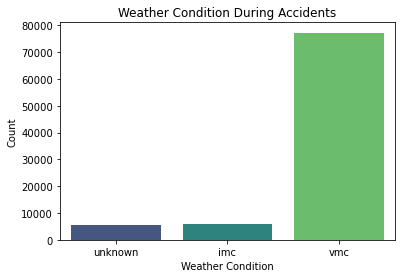

In [33]:
# Plot distribution of Weather Condition
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='weather_condition', palette='viridis')
plt.title('Weather Condition During Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

##### Observations
1. A few well known manufacturers dominate accident reports, which may be a reflection of high market share as opposed to poor safety records
 - Recommendation:
    Choose aircrafts from well established manufacturers with robust safety records and strong maintenance support
2. Highest accident counts are in personal, instructional and business aviation
 - Recommendation:
    For low risks, commercial operations offer safety due to strict regulations and operational standards.Pilot experience and maintenance may be the reason as to why personal and instructional aviation has a higher risk
3. A majority of accidents are non-fatal or incidents; incidents are more 
 - Recommendation:
    The best approach here is to invest in trining pilots, maintenance of the aircrafts and getting newer models to reduce severity risks
4. Most accidents occur in VMC (good weather) compared to IMC (poor weather) 

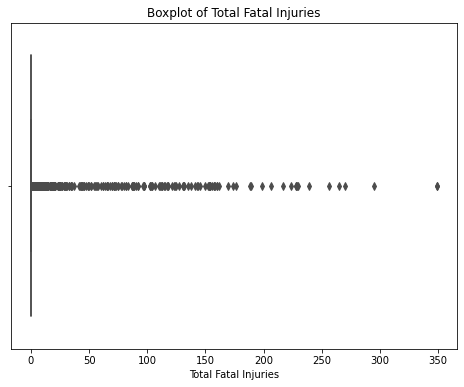

In [34]:
# Create a boxplot for total fatal injuries
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['total_fatal_injuries'], color='b')
plt.title('Boxplot of Total Fatal Injuries')
plt.xlabel('Total Fatal Injuries')
plt.show()


##### Observation
- Most of the fatalities are zero as seen in the boxplot, there are a few accidents that cause fatalities
- The outlier seen with 350 fatal injuries if likely from a big aircraft. Since most of the aircrafts in our dataset are small, this would explain why it appears as an outlier
-Removing the outliers using the IQR will alter our analysis since they are not false


#### b. Bivariate Analysis

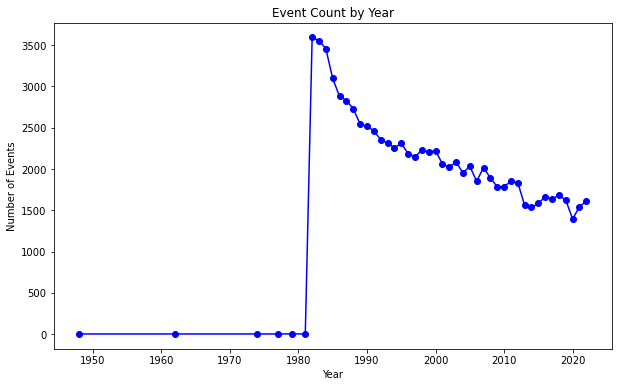

In [35]:
# Extract year from event_date
data['event_year'] = data['event_date'].dt.year

# Group by year and count event_id
event_counts = data.groupby('event_year')['event_id'].count().reset_index()

# Plot the line graph
plt.figure(figsize=(10,6))
plt.plot(event_counts['event_year'], event_counts['event_id'], marker='o', color='blue')
plt.title('Event Count by Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.show()

##### Observation
here are seasonal patterns in aviation accidents. Understanding and adapting to seasonal patterns directly contributes to lower operational risk, improved safety records, and higher profitability.

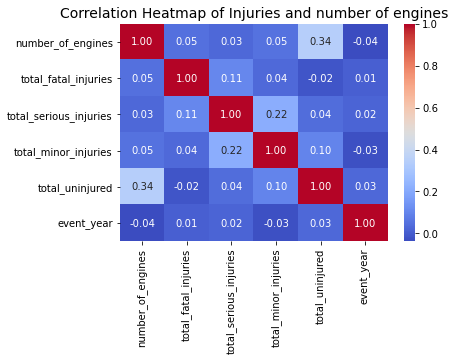

In [36]:
#correlation heatmap for int_col(numerical columns) and 
data_num= data.select_dtypes(include= 'number')
corr= data_num.corr()
sns.heatmap(corr,annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Injuries and number of engines', fontsize=14)
plt.show()

##### Observation
- Strong negative correlation (-0.82) between total fatalities and total uninjured, which is expected — if fatalities go up, survivors go down.

- Positive correlation (0.53) between serious injuries and fatalities, meaning accidents with serious injuries are more likely to also have fatalities.

- Number of engines has weak correlation with injuries, suggesting that engine count alone doesn't strongly determine injury severity.

- Minor injuries show weak correlations with all other factors, reaffirming that minor injuries are rare and scattered.



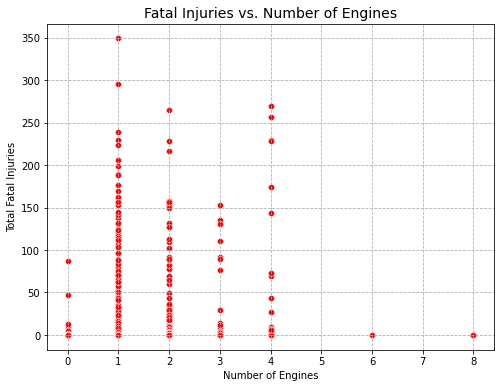

In [37]:
# Fatal injuries VS Number of engines
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='number_of_engines', y='total_fatal_injuries', color='red')

plt.title('Fatal Injuries vs. Number of Engines', fontsize=14)
plt.xlabel('Number of Engines')
plt.ylabel('Total Fatal Injuries')
plt.grid(axis='both', linestyle='--')

plt.show()

##### Observations
- Most aircraft, regardless of having 1 or 2 engines, cluster around zero fatal injuries — suggesting that most accidents aren't fatal.

- There is no strong visible trend showing that more engines lead to more or fewer fatal injuries.

- Occasional spikes in fatal injuries happen both for single-engine and multi-engine aircraft, meaning engine count alone isn't a strong predictor of fatalities.

#### c. Multivariate Analysis

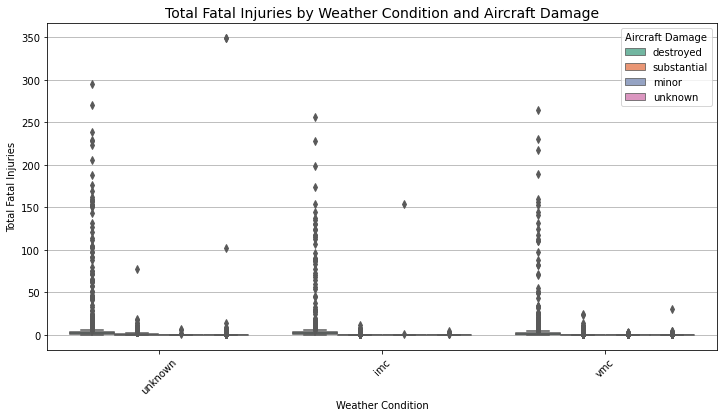

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data,x='weather_condition',y='total_fatal_injuries',hue='aircraft_damage',palette='Set2')

plt.title('Total Fatal Injuries by Weather Condition and Aircraft Damage', fontsize=14)
plt.xlabel('Weather Condition')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.legend(title='Aircraft Damage')
plt.grid(axis='y' );


##### Observation
Adverse weather conditions (IMC, rain, snow) tend to show fewer incidents overall, but when they occur, the severity is typically higher — particularly when the aircraft sustains substantial or destroyed damage.

##### Recommendation
- Invest in aircraft with stronger structural integrity and damage resistance, especially if operations will occur in regions prone to variable or poor weather conditions.

- Focus on advanced weather-avoidance technologies and pilot training for IMC conditions, as weather paired with severe aircraft damage significantly increases fatalities.

- For risk mitigation, prioritize strict weather-related flight restrictions, particularly for aircraft models prone to higher damage levels in poor conditions.